In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


from sklearn.metrics import auc as sklearn_auc



#### Explanation of the variables of the dataset



HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
    
BMI : Body Mass Index (BMI).
    
Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
    
AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
                                  
Stroke : (Ever told) (you had) a stroke?
                                  
PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
                    
MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
                                  
DiffWalking : Do you have serious difficulty walking or climbing stairs?
                                  
Sex : Are you male or female?
                                  
AgeCategory: Fourteen-level age category.
                                  
Race : Imputed race/ethnicity value.
                                  
Diabetic : (Ever told) (you had) diabetes?
                                  
PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
                                  
GenHealth : Would you say that in general your health is...
                                  
SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
                                  
Asthma : (Ever told) (you had) asthma?
                                  
KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
                                  
SkinCancer : (Ever told) (you had) skin cancer?

In [2]:
df = pd.read_csv('/Users/ishikadang/Downloads/heart_2020_cleaned.csv.zip')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.shape

(319795, 18)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


####  Central Tendency Measures

In [9]:
numeric_cols = df.select_dtypes(include=['number'])

In [10]:
mean_values = numeric_cols.mean()

In [11]:
median_values = numeric_cols.median()

In [12]:
mode_values = numeric_cols.mode().iloc[0]

In [13]:
central_tendency = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

In [14]:
print("Central Tendency Measures:")
print(central_tendency)

Central Tendency Measures:
                     Mean  Median   Mode
BMI             28.325399   27.34  26.63
PhysicalHealth   3.371710    0.00   0.00
MentalHealth     3.898366    0.00   0.00
SleepTime        7.097075    7.00   7.00


#### Variability Measures

In [15]:
variance_values = numeric_cols.var()
std_dev_values = numeric_cols.std()


In [16]:
variability = pd.DataFrame({
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

In [17]:
print("\nVariability Measures:")
print(variability)


Variability Measures:
                 Variance  Standard Deviation
BMI             40.400010            6.356100
PhysicalHealth  63.216019            7.950850
MentalHealth    63.285767            7.955235
SleepTime        2.062116            1.436007


#### EDA

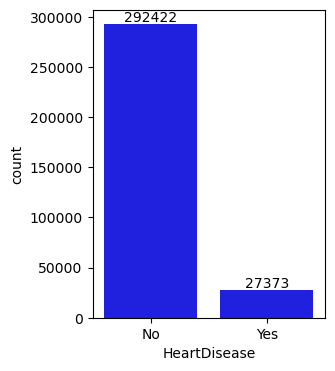

In [18]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='HeartDisease',data= df,color = 'b')
for i in ax.containers:
    ax.bar_label(i)
    
    

In [19]:
target_temp = df['HeartDisease'].value_counts()

In [20]:
print("Percentage of patinets without heart problem: "+str(round(target_temp[0]*100/len(df),2)))
print("Percentage of patinets with heart problem: "+str(round(target_temp[1]*100/len(df),2))) 

Percentage of patinets without heart problem: 91.44
Percentage of patinets with heart problem: 8.56


In [21]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [22]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

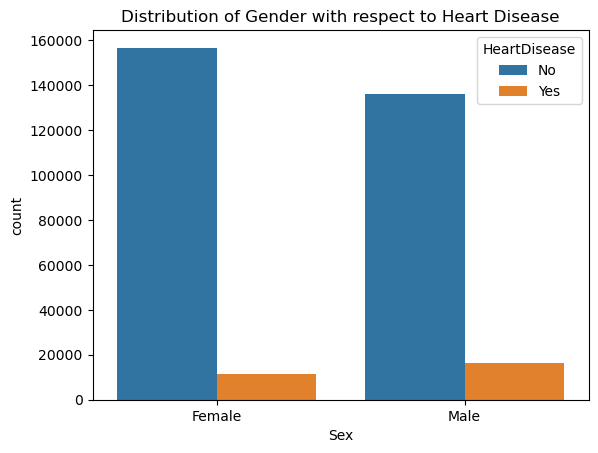

In [23]:
sns.countplot(x='Sex', hue = 'HeartDisease',data=df)
plt.title('Distribution of Gender with respect to Heart Disease')
plt.show()

Most cases of heart disease are men .

Most cases that got no heart disease are women .

In [24]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [25]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [26]:
numerical_cols = df.select_dtypes(include=['float64'])


In [27]:
numerical_cols

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [28]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [29]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [30]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

#### Categorical 

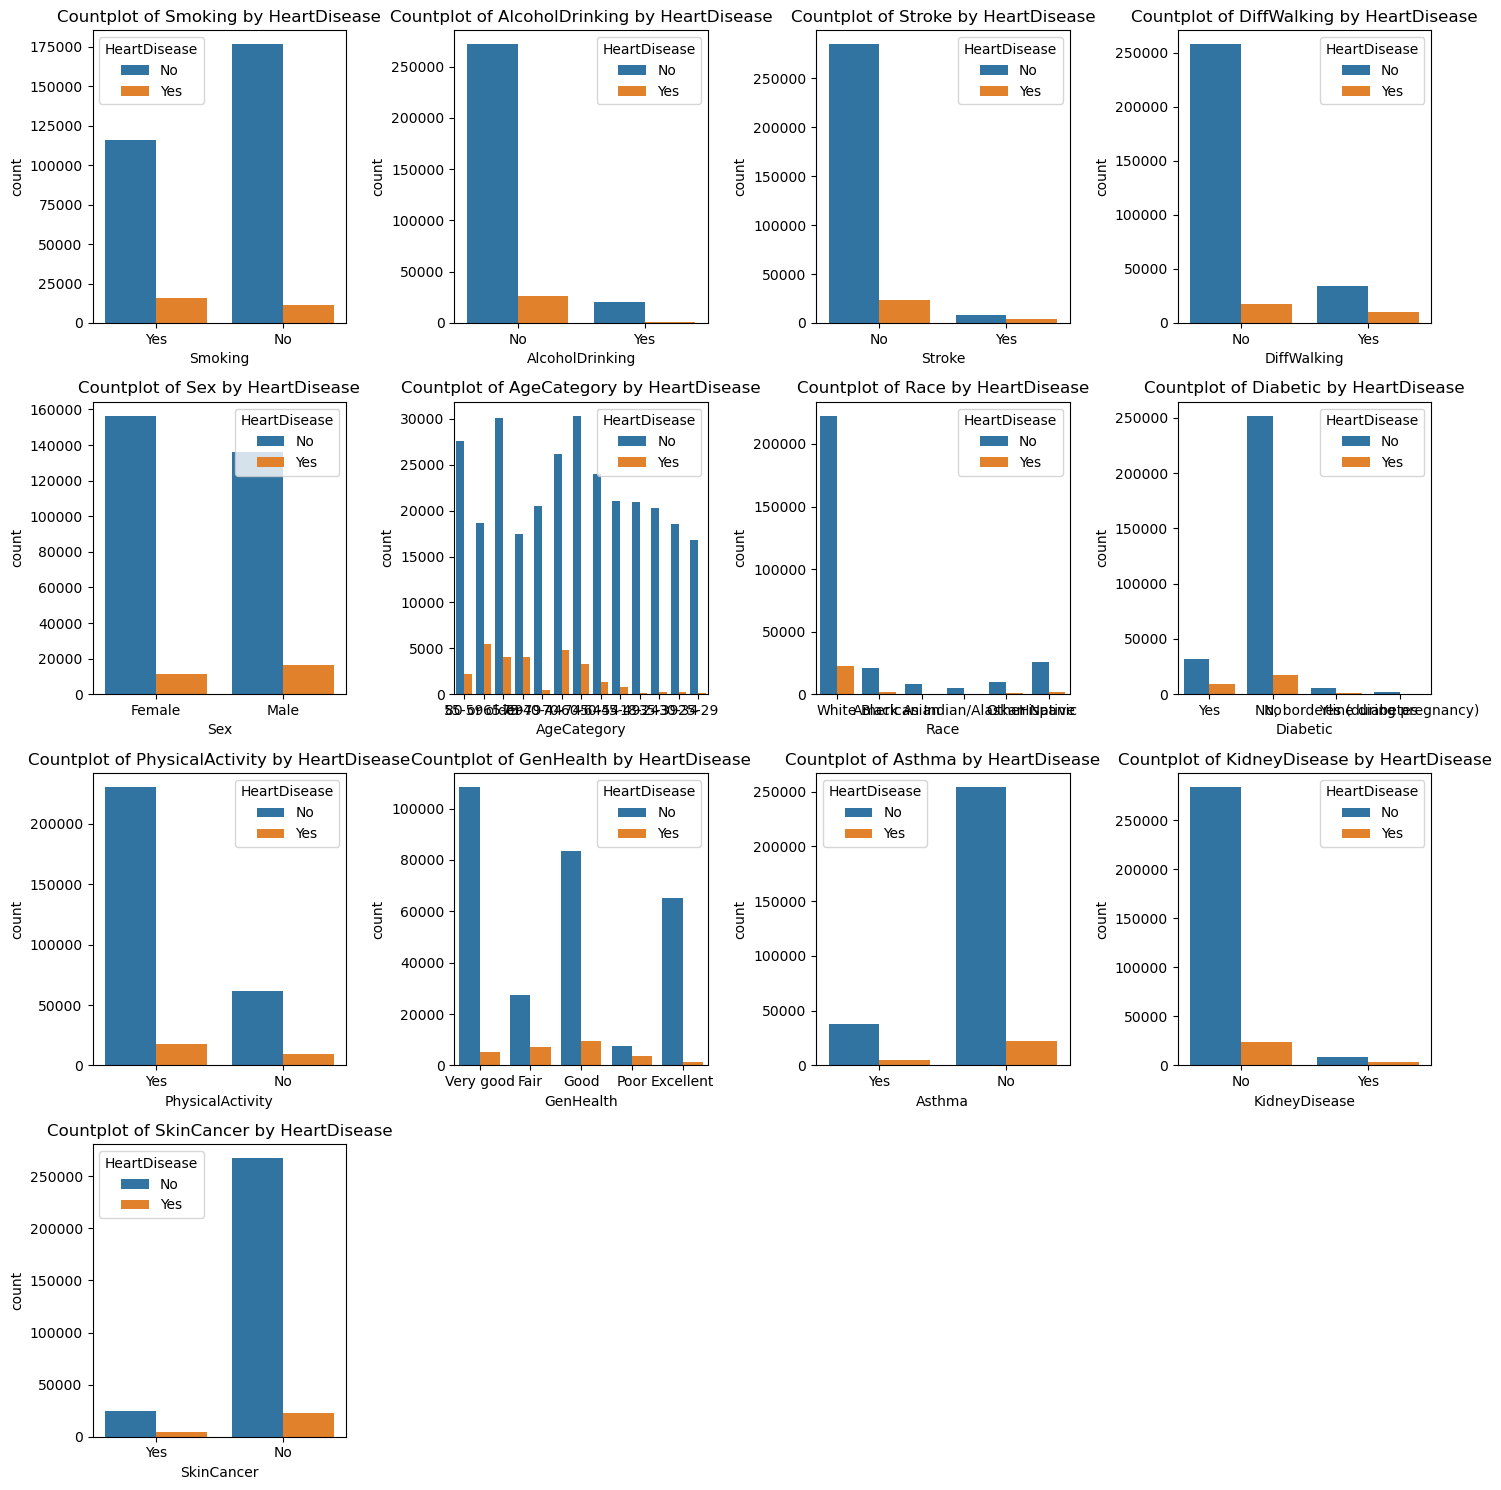

In [31]:

categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking','Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=column, hue='HeartDisease', data=df)
    plt.title(f'Countplot of {column} by HeartDisease')

plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Text(0.5, 1.02, 'Histograms of Numerical Variables')

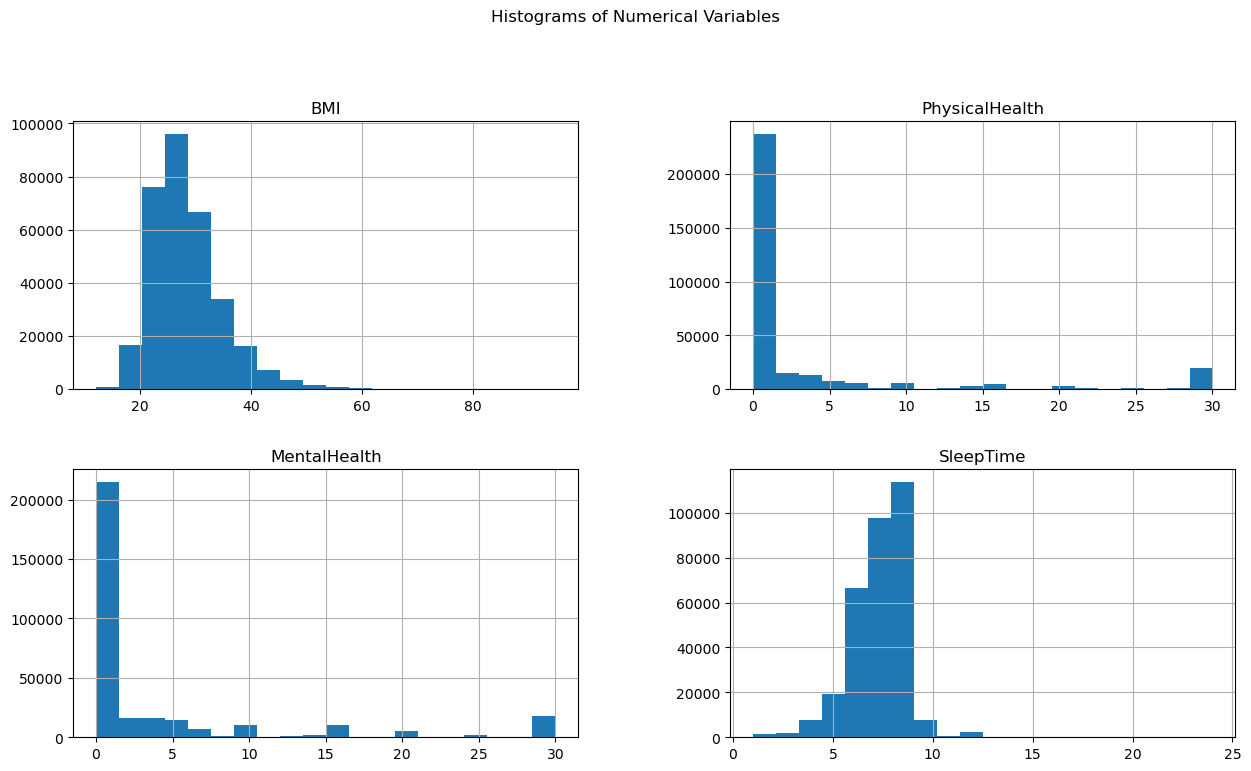

In [33]:
numerical_cols.hist(bins=20, figsize=(15, 8))
plt.suptitle('Histograms of Numerical Variables', y='1.02')

#### Heart Disease Frequency for ages

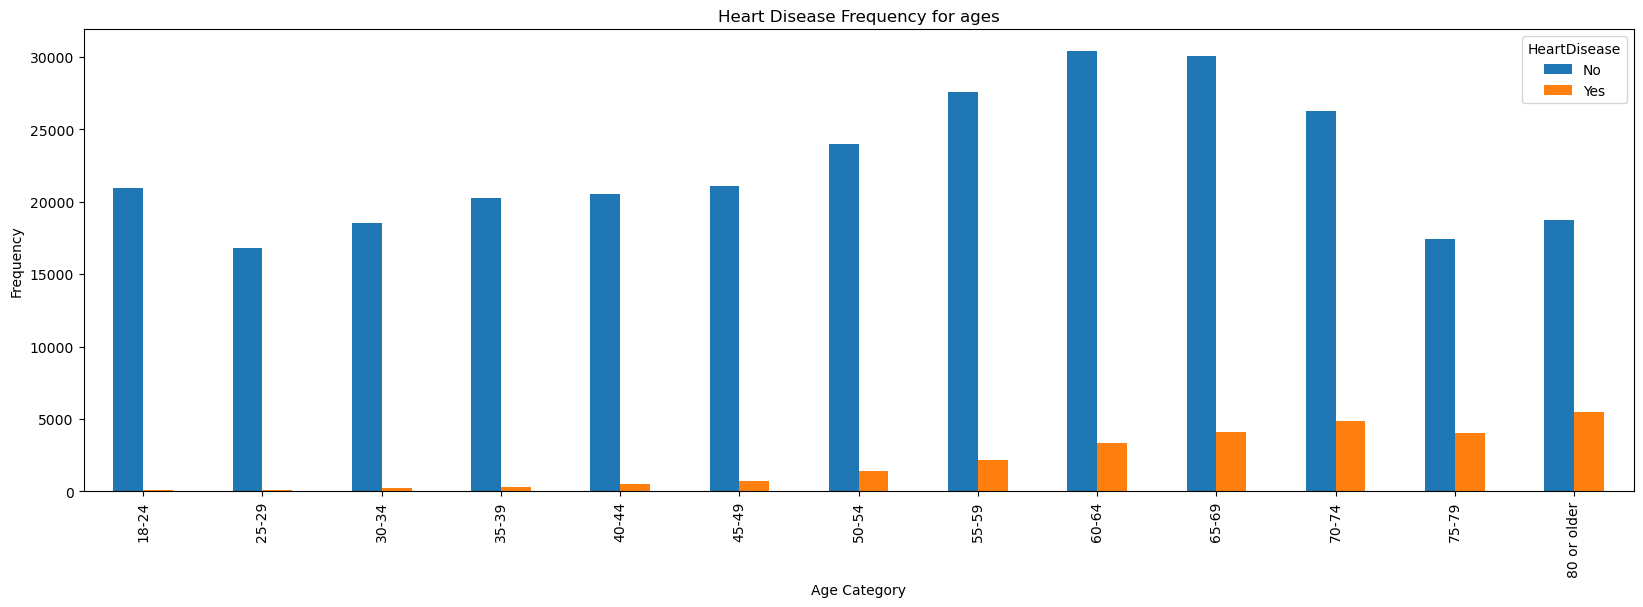

In [34]:
pd.crosstab(df.AgeCategory,df.HeartDisease).plot(kind = "bar",figsize =(20,6))
plt.title('Heart Disease Frequency for ages')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [35]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Heart disease according to Race

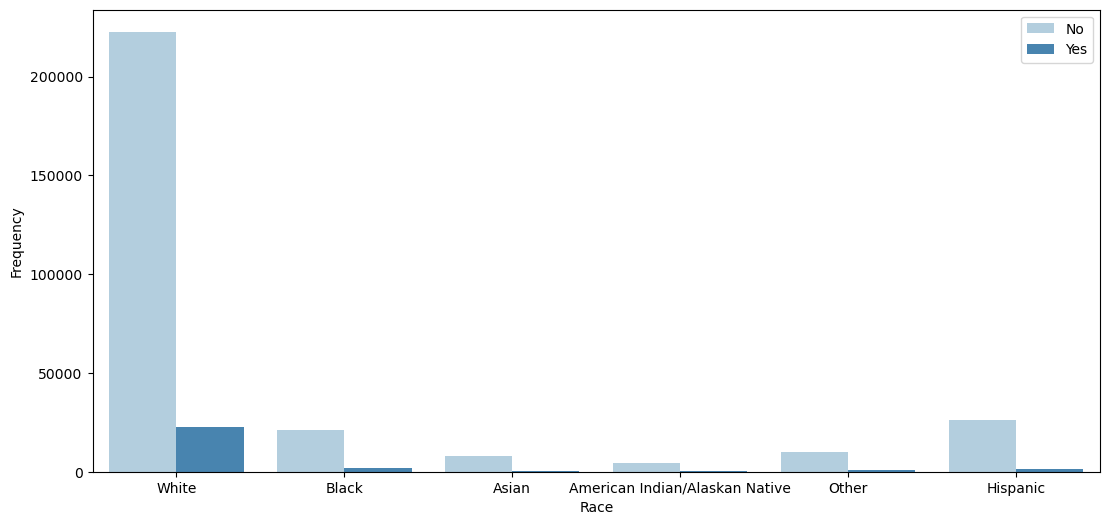

In [36]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

#### Heart disease according to Diabetic

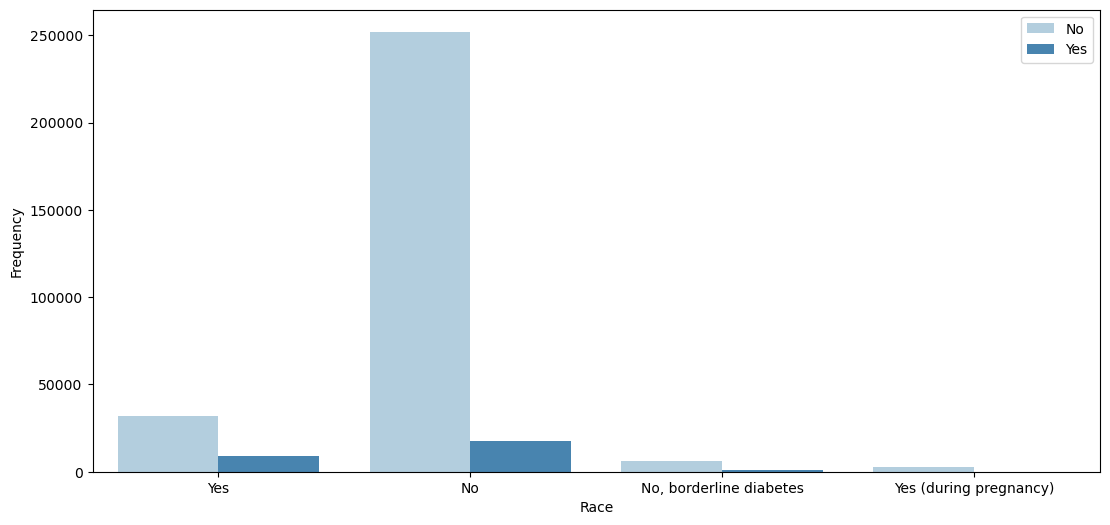

In [37]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Diabetic'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

#### Heart disease according to Smoking

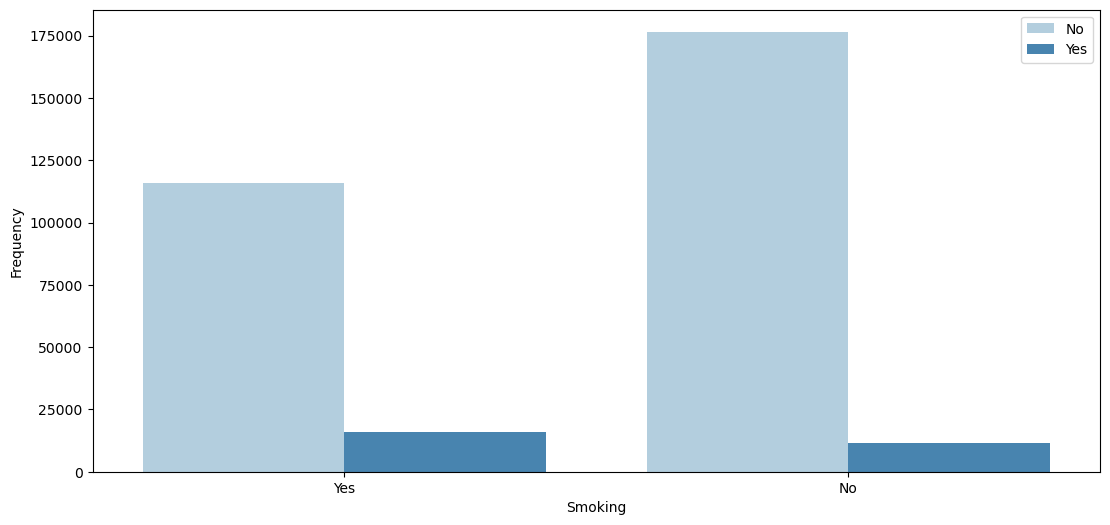

In [38]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Smoking'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Smoking')
plt.legend()
plt.ylabel('Frequency')
plt.show()

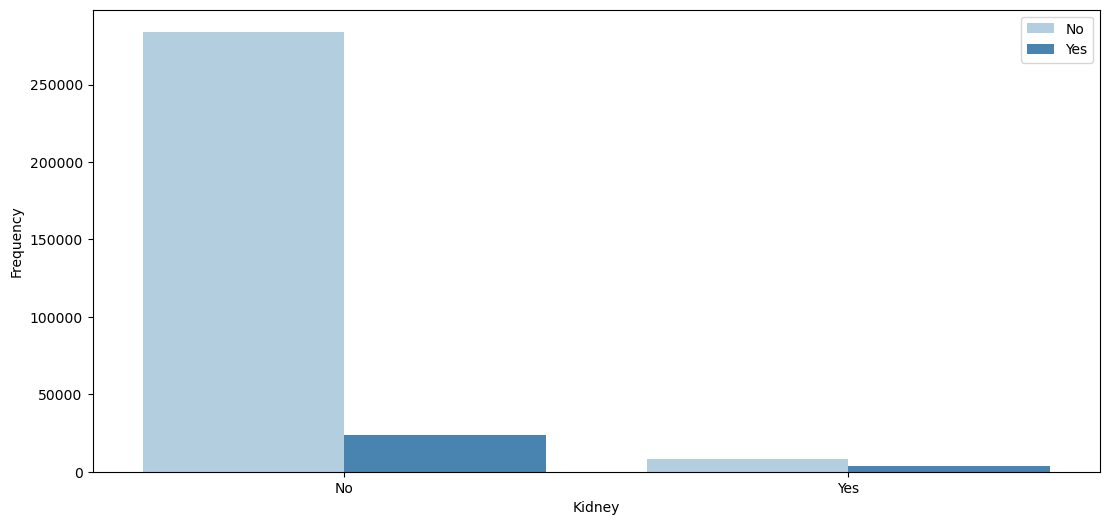

In [39]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['KidneyDisease'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Kidney')
plt.legend()
plt.ylabel('Frequency')
plt.show()

Majority of them have no kidney problem

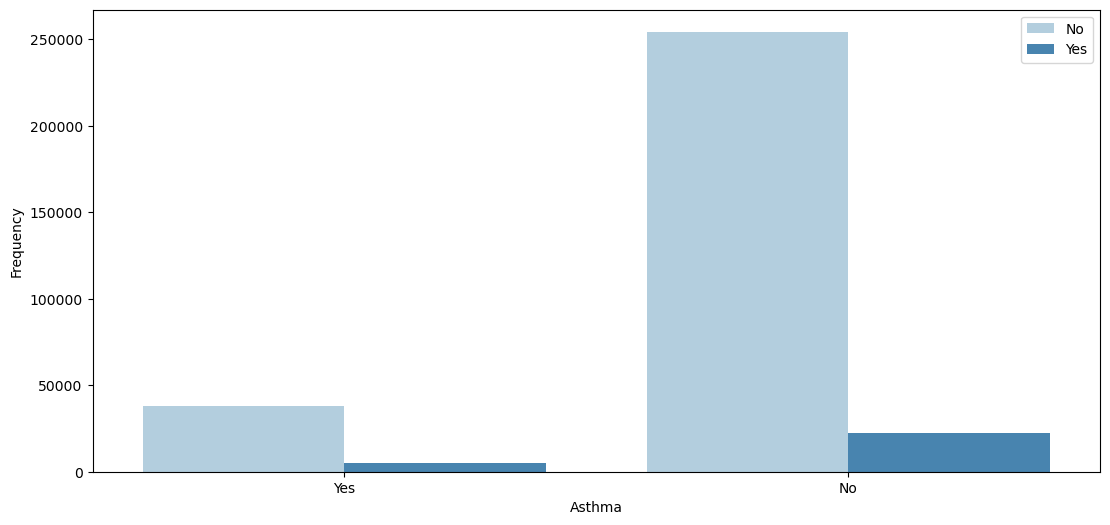

In [40]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Asthma'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Asthma')
plt.legend()
plt.ylabel('Frequency')
plt.show()

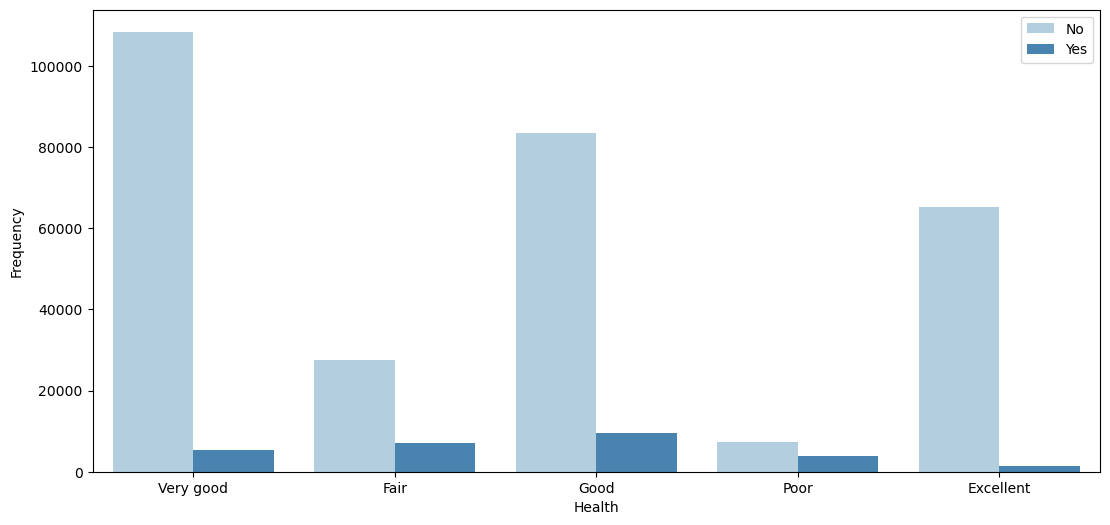

In [41]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['GenHealth'], hue = 'HeartDisease', data = df, palette = 'Blues')
plt.xlabel('Health')
plt.legend()
plt.ylabel('Frequency')
plt.show()

In [42]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Numerical

<function matplotlib.pyplot.show(close=None, block=None)>

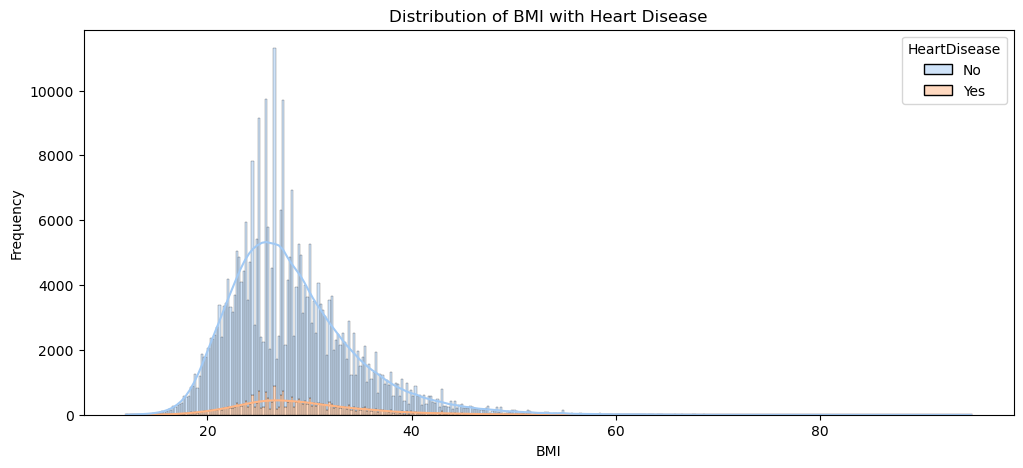

In [43]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,x='BMI',hue='HeartDisease' ,kde=True,multiple ='stack',palette='pastel')
plt.title('Distribution of BMI with Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show

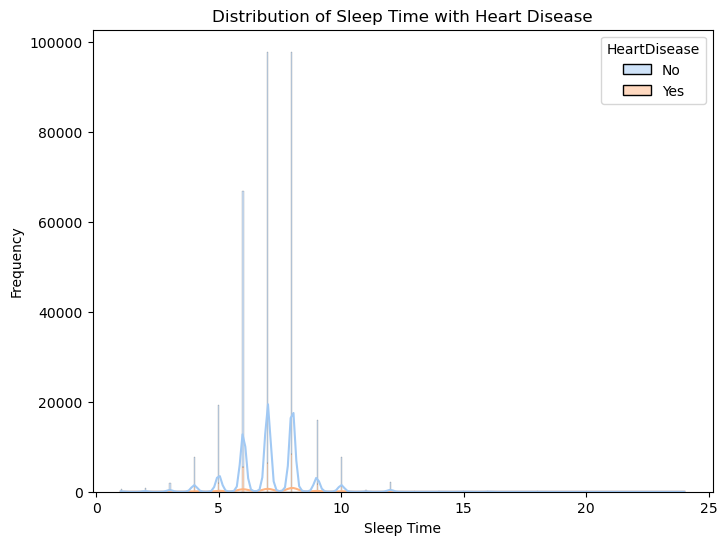

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='SleepTime',hue='HeartDisease' ,kde=True,multiple ='stack',palette='pastel')
plt.title('Distribution of Sleep Time with Heart Disease')
plt.xlabel('Sleep Time')
plt.ylabel('Frequency')
plt.show()


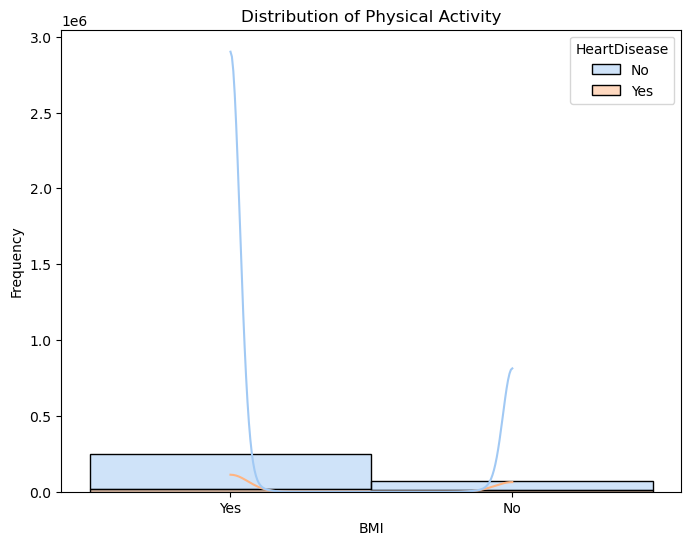

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='PhysicalActivity',hue='HeartDisease' ,kde=True,multiple ='stack',palette='pastel')
plt.title('Distribution of Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


#### Boxplot

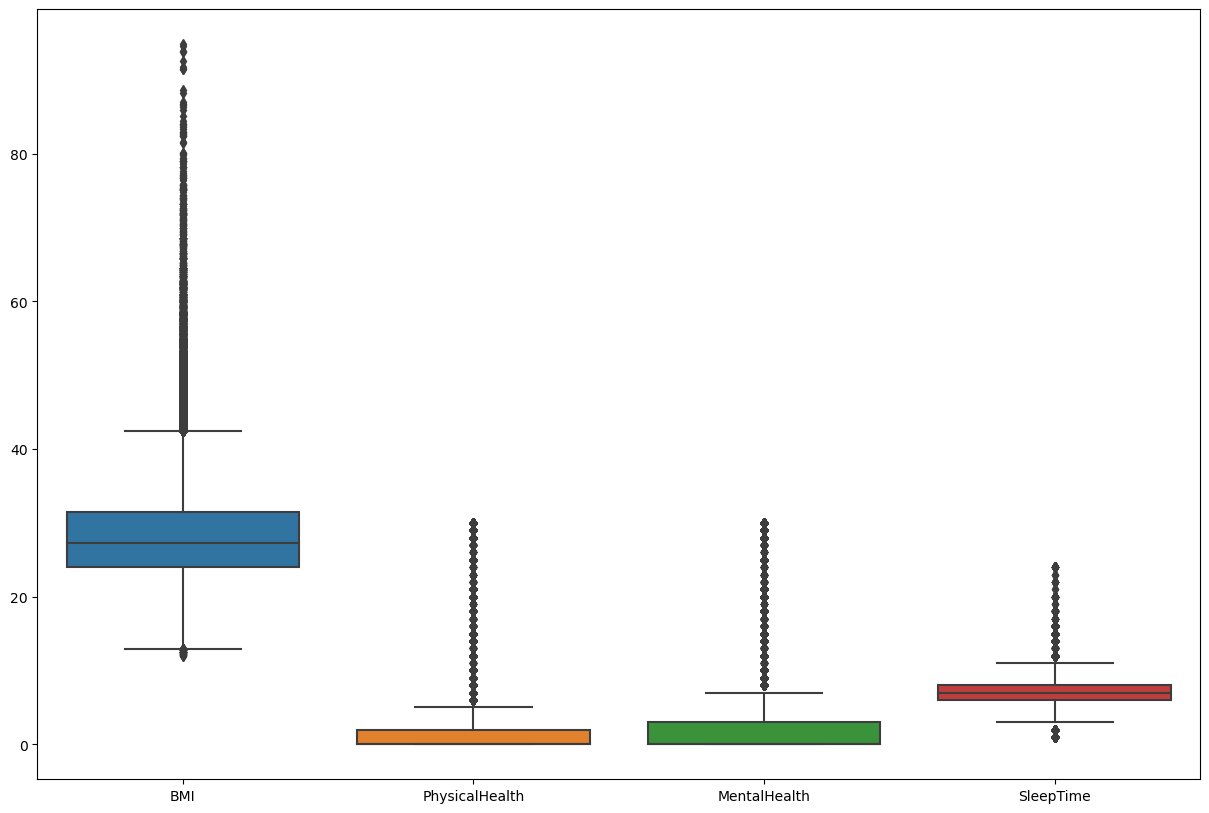

In [46]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.show()

#### Correlation

/var/folders/9d/nr26220x5y13nvbdpjsn82cw0000gn/T/ipykernel_57584/3316951442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


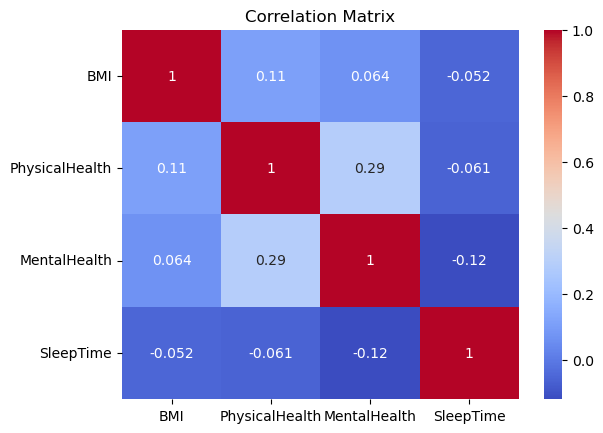

In [47]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [48]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


/var/folders/9d/nr26220x5y13nvbdpjsn82cw0000gn/T/ipykernel_57584/4129536207.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [49]:
correlation_matrix

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [50]:
df = df.drop(['Asthma','SkinCancer','Race'], axis =1)

In [51]:
df = df.drop(['PhysicalActivity','KidneyDisease'], axis =1)

In [52]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'GenHealth', 'SleepTime'],
      dtype='object')

In [53]:
df = df.drop(['AgeCategory'], axis =1)

#### Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = le.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = le.fit_transform(df['Stroke'])
df['DiffWalking'] = le.fit_transform(df['DiffWalking'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])





In [57]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,GenHealth,SleepTime
0,0,16.60,1,0,0,3.0,30.0,0,0,2,4,5.0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,4,7.0
2,0,26.58,1,0,0,20.0,30.0,0,1,2,1,8.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,2,6.0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,2,1,6.0
319791,0,29.84,1,0,0,0.0,0.0,0,1,0,4,5.0
319792,0,24.24,0,0,0,0.0,0.0,0,0,0,2,6.0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,2,12.0


In [58]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic',
       'GenHealth', 'SleepTime'],
      dtype='object')

#### Split Dataset for Training and Testing

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [60]:
X = df.drop(['HeartDisease'], axis =1)
y = df['HeartDisease']


In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(239846, 11) (239846,)
(79949, 11) (79949,)


In [62]:
x_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,GenHealth,SleepTime
260315,27.89,1,0,0,14.0,14.0,0,1,0,4,6.0
258969,24.95,1,0,0,0.0,15.0,0,1,0,0,7.0
205010,24.89,0,0,0,0.0,4.0,0,0,0,4,7.0
279411,21.52,0,0,0,0.0,0.0,0,0,0,0,8.0
312286,40.89,1,0,0,0.0,0.0,0,1,0,4,7.0


In [63]:
x_train.isnull().sum().sum()

0

In [64]:
scaler = StandardScaler()

# Scale trainint data
x_train = scaler.fit_transform(x_train)

# Scale test data
x_test = scaler.fit_transform(x_test)

#### Logistic Regression

In [65]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(x_train, y_train)
predictions_LR = LR.predict(x_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))

cf_matrix = confusion_matrix(predictions_LR, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_LR))



Logistic regression accuracy: 0.9135949167594342

Confusion Matrix:
[[72572  6476]
 [  432   469]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.52      0.07      0.12      6945

    accuracy                           0.91     79949
   macro avg       0.72      0.53      0.54     79949
weighted avg       0.88      0.91      0.88     79949



Confusion Matrix:

True Positives (TP): 706 instances were correctly predicted as positive (Heart Disease).

True Negatives (TN): 72,386 instances were correctly predicted as negative (No Heart Disease).

False Positives (FP): 6,239 instances were predicted as positive but actually were negative.

False Negatives (FN): 618 instances were predicted as negative but actually were positive.

ROC AUC Score: 0.7560


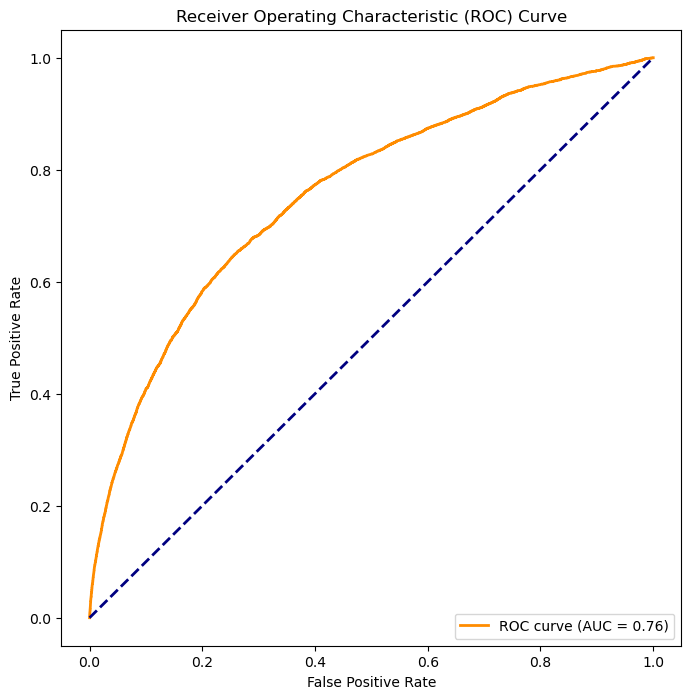

In [76]:
y_probs = LR.predict_proba(x_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score: {roc_auc:.4f}')


fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
from sklearn.neighbors import KNeighborsClassifier


In [73]:
# Build a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9038
Confusion Matrix:
 [[71488  1516]
 [ 6173   772]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     73004
           1       0.34      0.11      0.17      6945

    accuracy                           0.90     79949
   macro avg       0.63      0.55      0.56     79949
weighted avg       0.87      0.90      0.88     79949



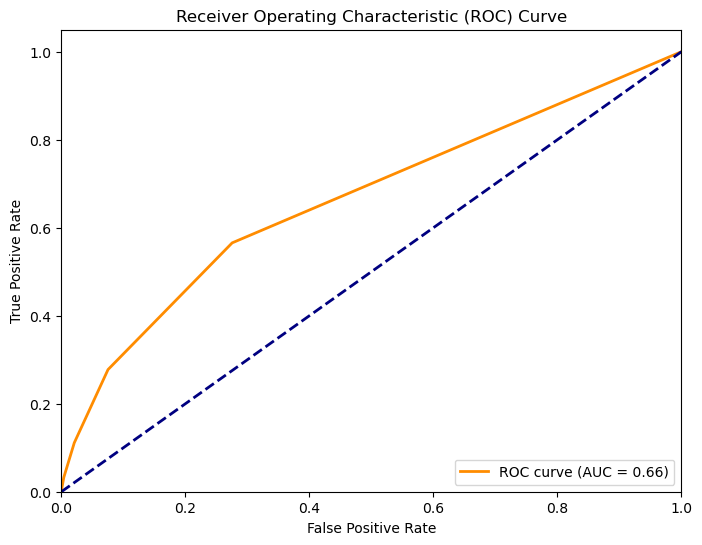

In [85]:
# Train the model
knn.fit(x_train, y_train)

# Predict probabilities for the positive class
y_probs = knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = sklearn_auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()